In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.transforms as mtransforms
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
from plotnine import *
#pip install brewer2mpl
import brewer2mpl
from datetime import datetime
from matplotlib import cm
#pip install joypy
#pip install adjustText
import joypy
from adjustText import *

In G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In G:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df=pd.read_csv('Effects.csv')
df.head()

,Direction,Year,Date,Weekday,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,Exports,2015,31/01/2015,Saturday,1/02/2020,All,All,All,$,257000000,257000000
1,Exports,2015,1/02/2015,Sunday,2/02/2020,All,All,All,$,123000000,380000000
2,Exports,2015,2/02/2015,Monday,3/02/2020,All,All,All,$,176000000,556000000
3,Exports,2015,3/02/2015,Tuesday,4/02/2020,All,All,All,$,115000000,671000000
4,Exports,2015,4/02/2015,Wednesday,5/02/2020,All,All,All,$,74000000,746000000


In [4]:
df.dtypes

Direction         object
Year               int64
Date              object
Weekday           object
Current_Match     object
Country           object
Commodity         object
Transport_Mode    object
Measure           object
Value              int64
Cumulative         int64
dtype: object

## 1 数据的总体分布情况

### 交易方向

In [5]:
direction=df.loc[:,'Direction'].value_counts()
direction.rename(index={'Exports':'出口','Imports':'进口','Reimports':'复进口'},inplace=True)
direction_labels=list(direction.index)
direction_value=list(direction.values)
bmap = brewer2mpl.get_map('Pastel1', 'qualitative', 3)
direction_colors=bmap.mpl_colors

### 国家

In [6]:
country=df.loc[:,'Country'].value_counts()
country.rename(index={'All':'总体','China':'中国','United States':'美国',
                     'Australia':'澳大利亚','United Kingdom':'英国',
                     'East Asia (excluding China)':'东亚(除中国)',
                     'Japan':'日本','European Union (28)':'欧盟',
                     'Total (excluding China)':'总体(除中国)'},inplace=True)
country_labels=list(country.index)
country_value=list(country.values)
bmap = brewer2mpl.get_map('Set3', 'qualitative', 10)
country_colors=bmap.mpl_colors

### 商品

In [7]:
commodity=df.loc[:,'Commodity'].value_counts()
commodity.rename(index={'All':'总体','Meat':'肉','Dairy':'乳制品',
                        'Forestry':'林业','Non-food manufactured goods':'非食品业',
                        'Machinery and electronics':'机械和电子产品','Seafood':'海产品',
                       'Fruit':'水果'},inplace=True)
commodity_labels=list(commodity.index)
commodity_value=list(commodity.values)
bmap = brewer2mpl.get_map('Pastel2', 'qualitative', 8)
commodity_colors=bmap.mpl_colors

### 运输方式

In [8]:
trans=df.loc[:,'Transport_Mode'].value_counts()
trans.rename(index={'All':'总体','Air':'空运','Sea':'海运'},inplace=True)
trans_labels=list(trans.index)
trans_value=list(trans.values)
bmap = brewer2mpl.get_map('Set2', 'qualitative', 3)
trans_colors=bmap.mpl_colors

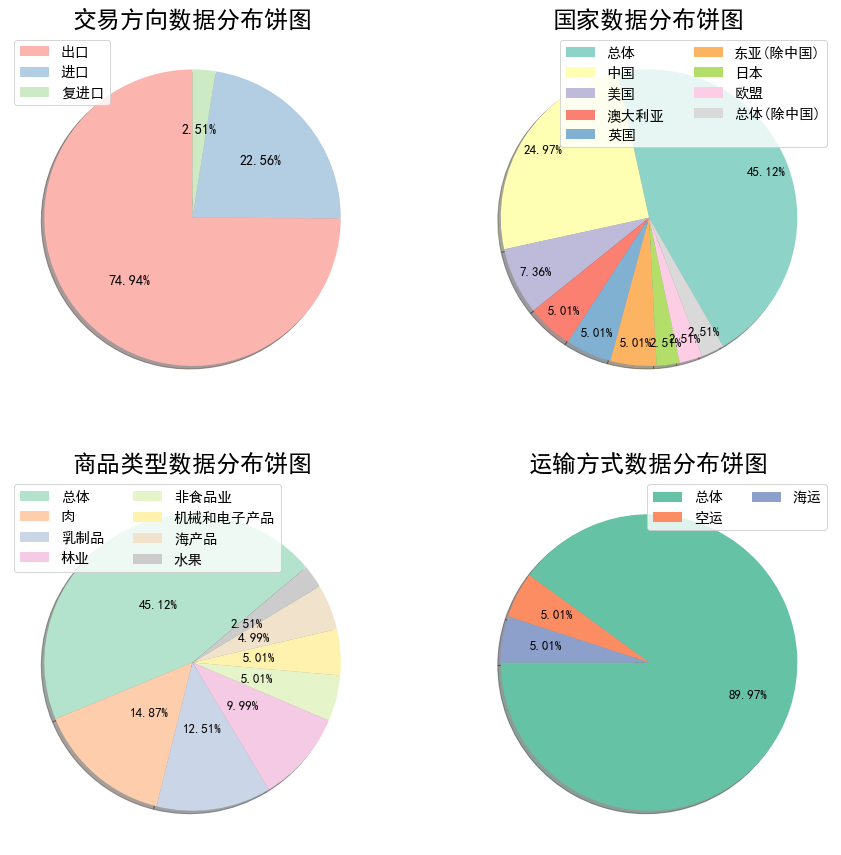

In [9]:
fig, ax = plt.subplots(2, 2,figsize=(15,15))
#交易方向
patches,l_text,p_text=ax[0,0].pie(direction_value,
                                  colors=direction_colors, 
                                  autopct='%.2f%%',
                                  shadow=True,startangle=90)
ax[0,0].set_title('交易方向数据分布饼图',fontsize=24)
ax[0,0].legend(labels=direction_labels,loc=2,fontsize=14.5)
ax[0,0].set_aspect('equal')
for t in p_text:
    t.set_size(14)

#国家
patches,l_text,p_text=ax[0,1].pie(country_value,
                                  colors=country_colors,
                                  autopct='%.2f%%',
                                  shadow=True,startangle=300,
                                  pctdistance=0.85)
ax[0,1].set_title('国家数据分布饼图',fontsize=24)
ax[0,1].legend(labels=country_labels,loc=1,fontsize=14.5,ncol=2)
ax[0,1].set_aspect('equal')
for t in p_text:
    t.set_size(13)
    
#商品
patches,l_text,p_text=ax[1,0].pie(commodity_value,
                                  colors=commodity_colors,
                                  autopct='%.2f%%',
                                  shadow=True,startangle=40,
                                  pctdistance=0.45)
ax[1,0].set_title('商品类型数据分布饼图',fontsize=24)
ax[1,0].legend(labels=commodity_labels,loc=2,fontsize=14.5,ncol=2)
ax[1,0].set_aspect('equal')
for t in p_text:
    t.set_size(13)

#运输方式
patches,l_text,p_text=ax[1,1].pie(trans_value,
                                  colors=trans_colors,
                                  autopct='%.2f%%',
                                  shadow=True,startangle=180,
                                  pctdistance=0.7)
ax[1,1].set_title('运输方式数据分布饼图',fontsize=24)
ax[1,1].legend(labels=trans_labels,loc=1,fontsize=14.5,ncol=2)
ax[1,1].set_aspect('equal')
for t in p_text:
    t.set_size(13)
    
plt.savefig("pie1.png", dpi=100)

In [10]:
def status(x):
    return pd.Series([x.count(),x.min(),x.quantile(.25),x.median(),x.quantile(.75),
                         x.mean(),x.max(),x.mad(),x.var(),x.std(),x.skew(),x.kurt()],
                         index=['总数','最小值','25%分位数','中位数','75%分位数',
                               '均值','最大值','平均绝对离差','方差','标准差','偏度','峰度'])
round(status(df.Value),4)

总数        4.308800e+04
最小值       0.000000e+00
25%分位数    1.000000e+06
中位数       1.000000e+07
75%分位数    3.200000e+07
均值        3.115804e+07
最大值       5.500000e+08
平均绝对离差    3.499626e+07
方差        2.784878e+15
标准差       5.277194e+07
偏度        2.502500e+00
峰度        6.487300e+00
dtype: float64

## 2 数据的筛选

In [11]:
df=pd.read_csv('Effects.csv')
df.Country.replace({"All":"总体","China":"中国"},inplace=True)
df.Commodity.replace({"All":"总体","Dairy":"乳制品","Meat":"肉类",
                        'Forestry':'林业','Non-food manufactured goods':'非食品业',
                        'Machinery and electronics':'机械和电子产品','Seafood':'海产品',
                       'Fruit':'水果'},inplace=True)
df.Direction.replace({'Exports':'出口','Imports':'进口'},inplace=True)
df.Transport_Mode.replace({'All':'总体','Air':'空运','Sea':'海运'},inplace=True)
df.Measure.replace({'$':'美元','Tonnes':'吨'},inplace=True)
df['Date']=[datetime.strptime(d, '%d/%m/%Y').date() for d in df['Date']]
df['Current_Match']=[datetime.strptime(d, '%d/%m/%Y').date() for d in df['Current_Match']]
df=df.query('Transport_Mode=="总体"')
df.head()

,Direction,Year,Date,Weekday,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative
0,出口,2015,2015-01-31,Saturday,2020-02-01,总体,总体,总体,美元,257000000,257000000
1,出口,2015,2015-02-01,Sunday,2020-02-02,总体,总体,总体,美元,123000000,380000000
2,出口,2015,2015-02-02,Monday,2020-02-03,总体,总体,总体,美元,176000000,556000000
3,出口,2015,2015-02-03,Tuesday,2020-02-04,总体,总体,总体,美元,115000000,671000000
4,出口,2015,2015-02-04,Wednesday,2020-02-05,总体,总体,总体,美元,74000000,746000000


In [12]:
total=df.query('Country =="总体"')
total_e=total.query('Direction=="出口"')
total_i=total.query('Direction=="进口"')
print(total.shape)
print(total_e.shape)
print(total_i.shape)

(15120, 11)
(10800, 11)
(3240, 11)


In [13]:
china=df.query('Country=="中国"')
china_e=china.query('Direction=="出口"')
china_i=china.query('Direction=="进口"')
print(china.shape)
print(china_e.shape)
print(china_i.shape)

(10758, 11)
(8598, 11)
(2160, 11)


## 3 分析

### 3.1 堆积折线图

分度量单位和运输方式

In [14]:
def stack_line(data=total_e,title='不同年份下世界各商品类型出口交易量堆积折线图',measure='Measure=="美元"'):   
    df1=data.query(measure)
    df1=df1.loc[:,['Date','Commodity','Value']]
#    df1=df1.pivot(index='Commodity',columns='Date',values='Value').fillna(0)
#    df1['Commodity']=list(df1.index)
#    df1=pd.melt(df1,id_vars='Commodity',var_name='Date',value_name='Value')
    df1=df1.pivot(index='Date',columns='Commodity',values='Value')
    df1['Date']=pd.to_datetime(list(df1.index))
    Sum_df=df1.iloc[:,0:df1.shape[1]-1].apply(lambda x: x.sum(),axis=0).sort_values(ascending=True)
    melt_df=pd.melt(df1,id_vars='Date',var_name='Commodity',value_name='Value')
    melt_df['Commodity']=pd.Categorical(melt_df['Commodity'],categories=Sum_df.index,ordered=True)
    melt_df['year']=[d.year for d in melt_df['Date']]
    melt_df['month']=[d.month for d in melt_df['Date']]
    melt_df['day']=[d.day for d in melt_df['Date']]
    #melt_df['month_day']=melt_df['month'].astype(str)+('0'+melt_df['day'].astype(str))
    day=melt_df['Date'].astype(str).str.split('-').str.get(-1)
    month=melt_df['Date'].astype(str).str.split('-').str.get(-2)
    melt_df['month_day']=month+'-'+day
    
    fg=(
        ggplot(melt_df,aes(x='month_day',y='Value',fill='Commodity',group='Commodity'))+
        geom_area(position="stack",alpha=1)+
        geom_line(position='stack',size=0.25,color='black')+
#   scale_x_date(date_labels="%m",date_breaks="1 month")+
        scale_fill_hue(s=0.99,l=0.65,h=0.0417,color_space='husl')+
        labs(fill='商品类型',
              x='日期',y='进口交易量（单位：美元）',
              title=title)+ 
        scale_x_discrete(breaks=['02-01','03-01','04-01','05-01','06-01','07-01','08-01'])+
        facet_grid('year~.')+
        theme_grey(base_size = 14)+ 
        theme(
            figure_size=(30,15),
            dpi=100,
            text=element_text(family="SimHei"),
            legend_text=element_text(size=14),
            legend_title=element_text(size=14),
            title=element_text(size=25),
            axis_text=element_text(size=12)
        )
    )
    
    return fg

In [15]:
fg1=stack_line()
fg2=stack_line(data=total_i,title='不同年份下世界各商品类型进口交易量堆积折线图')
fg3=stack_line(data=china_e,title='不同年份下中国各商品类型出口交易量堆积折线图')
fg4=stack_line(data=china_i,title='不同年份下中国各商品类型进口交易量堆积折线图')

In [16]:
#fg1.save(filename ='total_ex'+'_.png',height=5, width=10,units = 'in',dpi=100)
#fg2.save(filename ='total_im'+'_.png', height=10, width=20,units = 'in', dpi=1000)
#fg3.save(filename ='china_ex'+'_.png', height=5, width=10, units = 'in', dpi=100)
#fg4.save(filename ='china_im'+'_.png',height=10, width=20, units = 'in', dpi=1000)

### 3.2  乳制品出口交易量的变化分析

In [17]:
def diary_plot(data,measure='Measure=="吨"',
               x_lab='交易量（单位：吨）',title='世界总体乳制品出口交易量密度估计图',
               color=cm.Spectral_r):
    da=data.query(measure)
    da=da.query('Commodity=="乳制品"')
    Categories=[2015,2016,2017,2018,2019,2020]
    da['Year']=pd.Categorical(da['Year'],ordered=True,categories=Categories)
    fig,axes=joypy.joyplot(da,column=["Value"],
                      by="Year",ylim='own',colormap=cm.Spectral,
                      alpha=0.9,figsize=(6,5))
    plt.xlabel(x_lab,{'size':18})
    plt.ylabel('年份',{'size':18})
    plt.title(title,{'size':20})
    
    return fig

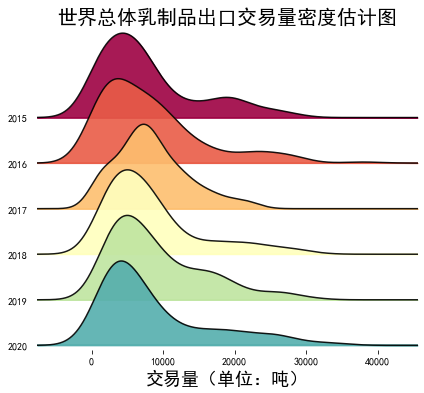

In [18]:
da1=diary_plot(data=total_e)
#da1.savefig('da1.png',dpi=300,bbox_inches='tight')

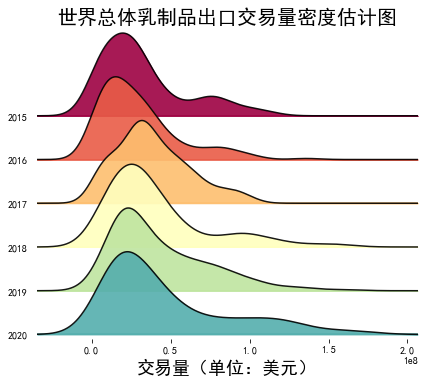

In [19]:
da2=diary_plot(data=total_e,measure='Measure=="美元"',
               x_lab='交易量（单位：美元）',title='世界总体乳制品出口交易量密度估计图')
#da2.savefig('da2.png',dpi=300,bbox_inches='tight')

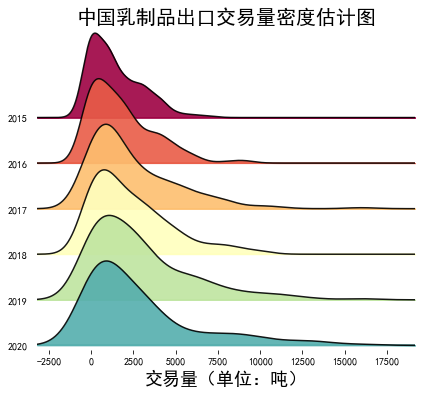

In [20]:
da3=diary_plot(data=china_e,title='中国乳制品出口交易量密度估计图',
               color=cm.Set1)
#da3.savefig('da3.png',dpi=300,bbox_inches='tight')

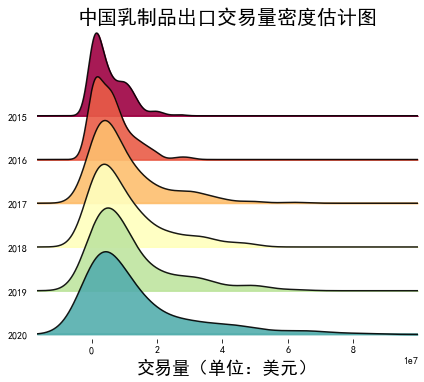

In [21]:
da4=diary_plot(data=china_e,measure='Measure=="美元"',
               x_lab='交易量（单位：美元）',title='中国乳制品出口交易量密度估计图',
               color=cm.Set1)
#da4.savefig('da4.png',dpi=300,bbox_inches='tight')

### 3.3 中国与世界总体进出口交易量的相对趋势分析

我们对于进出口方向、世界总体与国家的不同组合均选择了商品类型为总体，交易单位为美元的样本，

In [22]:
import scipy.stats as stats

In [23]:
total_e_all=total_e.query('Commodity=="总体" and Measure=="美元"')
total_i_all=total_i.query('Commodity=="总体" and Measure=="美元"')
china_e_all=china_e.query('Commodity=="总体" and Measure=="美元"')
china_i_all=china_i.query('Commodity=="总体" and Measure=="美元"')

In [24]:
def window_plot(data1,data2,r_window_size = 30,trans_type='（出口）',name='ex_window'):
    data1.insert(loc=0,column='China',value=list(data2.Value))
    data1.rename(columns={'Value':'World'},inplace=True)
    for i in ['Year','Weekday','Commodity']:
        data1[i]=pd.Categorical(data1[i],ordered=True) 
    
    data1.set_index('Date', drop=False,inplace=True)
    df_cor=data1.loc[:,['China','World']]
    df_cor.rename(columns={'China':'中国','World':'世界总体'},inplace=True)
    r,p=stats.pearsonr(df_cor.loc[:,'中国'],df_cor.loc[:,'世界总体'])
    print('相关系数为：',r)
    print('p值为：',p)
    
    df_interpolated = df_cor.interpolate()
    #计算滑动窗口同步性
    rolling_r = df_interpolated['中国'].rolling(window=r_window_size, center=True).corr(df_interpolated['世界总体'])
    f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
    df_cor.rolling(window=30,center=True).mean().plot(ax=ax[0])
    rolling_r.plot(ax=ax[1])
    #plt.suptitle(f"整体Pearson相关系数为{np.round(r,3)}")
    plt.xticks(fontsize=15)
    ax[0].tick_params(axis='y',labelsize=14)
    ax[1].tick_params(axis='y',labelsize=14)
    ax[1].set_xlabel('时间框（窗宽为'+str(r_window_size)+')',fontsize=18)
    ax[0].set_ylabel('贸易量滑动窗口中位数',fontsize=18)
    ax[1].set_ylabel('Pearson相关系数',fontsize=18)
    ax[0].legend(fontsize=12)
    ax[0].set_title(f"整体Pearson相关系数为{np.round(r,3)}"+trans_type,fontsize=20)
    
    f.savefig(name+'.png',dpi=300,bbox_inches='tight')
    return f

相关系数为： 0.6552317639788948
p值为： 1.8225849712684764e-133


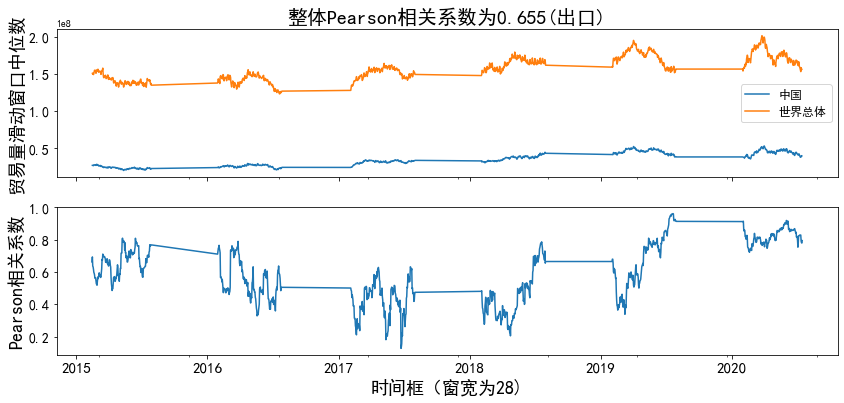

In [25]:
ex_window=window_plot(total_e_all,china_e_all,
                      r_window_size =28,trans_type='(出口)',name='ex_window')

相关系数为： 0.8683301778226376
p值为： 0.0


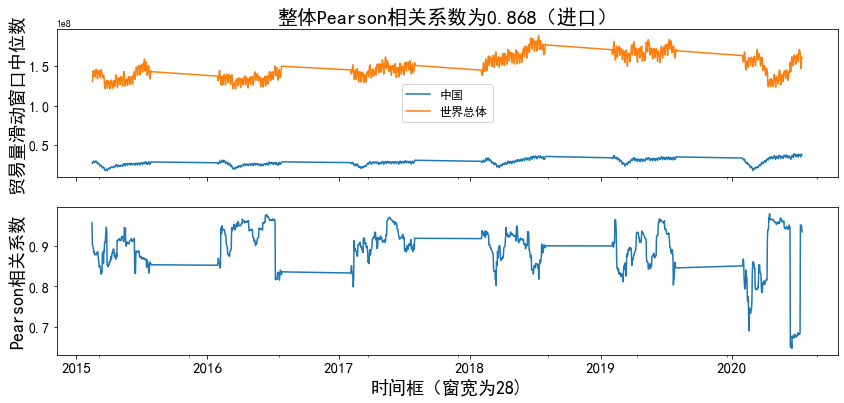

In [26]:
im_window=window_plot(total_i_all,china_i_all,
                      r_window_size = 28,trans_type='（进口）',name='im_window')

### 3.4 回归分析

In [27]:
from statsmodels.formula.api import ols
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
import math

In [28]:
china_ols=china_e.query('Measure=="美元" ')
china_ols['Date']=pd.to_datetime(china_ols['Current_Match'])
china_ols['month']=[d.month for d in china_ols['Date']]
china_ols['day']=[d.day for d in china_ols['Date']]
for i in ['Year','month','day']:
    china_ols[i]=pd.Categorical(china_ols[i],ordered=True)

formula = 'Value~Year+Weekday+Commodity+month'
model = ols(formula,data=china_ols).fit()
output=pd.DataFrame({'coef':[np.log10(x) if x>0 else -(np.log10(-x)) for x in model.params],
                     'p':-np.log10(model.pvalues)})
min_value=round(min(abs(output['coef'])),2)
print('需要调整的最小值为：',min_value)
output['p'].replace(float('inf'),100,inplace=True)
#print(model.params)
#print(-np.log10(model.pvalues))
print(model.summary())
output['变量名']=['截距项','2016年','2017年','2018年','2019年','2020年', '周一','周六','周日','周四','周二','周三','总体','林业','海产品','肉类','三月','四月','五月','六月','七月']
output['coef']=[x-min_value if x>0 else x+min_value for x in output['coef']]
y_threshold=10
output['效应方向']=output['coef'].apply(lambda x: '正向效应' if x>=0 else '负向效应')
output.drop(index=['Intercept'],inplace=True)
annot=output.loc[output['p']>=y_threshold]

需要调整的最小值为： 5.66
                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     430.0
Date:                Sat, 08 Jan 2022   Prob (F-statistic):               0.00
Time:                        16:30:01   Log-Likelihood:                -94021.
No. Observations:                5368   AIC:                         1.881e+05
Df Residuals:                    5347   BIC:                         1.882e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept       

In [29]:
adjust_text_dict = {'expand_points': (1.5, 1.5)}

p_ols=(
 ggplot()+
    geom_point(output,aes(x='coef',y='p',color='效应方向',size='p'))+
    geom_text(annot,aes(x='coef',y='p',label='变量名'),
             nudge_x=0.2,nudge_y=0.2,size=9,
             adjust_text=adjust_text_dict)+
    labs(x='sign(系数)*log10(abs(系数))-'+str(min_value),y='-log10(p值)',
         title='中国出口贸易量相关因素火山图')+ 
#    scale_x_discrete(breaks=['02-01','03-01','04-01','05-01','06-01','07-01','08-01'])+
    theme_grey(base_size = 8)+ 
    theme(
        text=element_text(family="SimHei"),
        legend_text=element_text(size=10),
        legend_title=element_text(size=10),
        title=element_text(size=14),
        axis_text=element_text(size=8)
    )+
    guides(size=False)
)

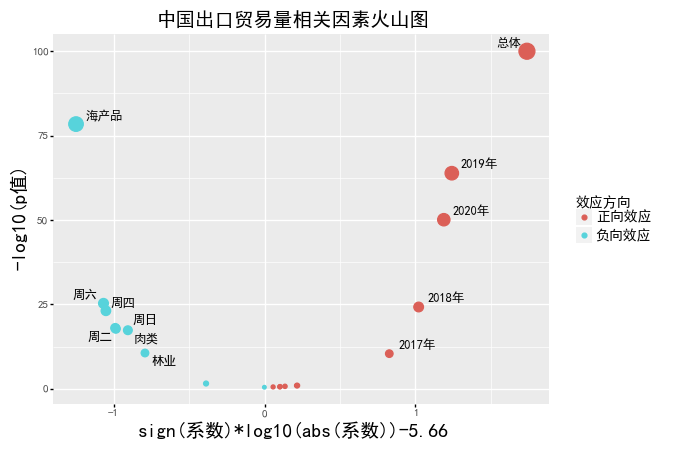

<ggplot: (-9223371900955034352)>

In [30]:
p_ols

In [31]:
#p_ols.save(filename ='china_ols'+'.png',dpi=300)

### 3.5 箱线图

In [32]:
china_box=china_ols.query('Commodity=="总体" ')
foo=china_box.query('month==1 or month==8')
china_box.drop(foo.index,inplace=True)

foo_dic={'二月':2,'三月':3,'四月':4,'五月':5,'六月':6,'七月':7}
for key,value in foo_dic.items():
    china_box['month'].replace(value,key,inplace=True)
china_box.head()

,Direction,Year,Date,Weekday,Current_Match,Country,Commodity,Transport_Mode,Measure,Value,Cumulative,month,day
1080,出口,2015,2020-02-01,Saturday,2020-02-01,中国,总体,总体,美元,33000000,33000000,二月,1
1081,出口,2015,2020-02-02,Sunday,2020-02-02,中国,总体,总体,美元,16000000,48000000,二月,2
1082,出口,2015,2020-02-03,Monday,2020-02-03,中国,总体,总体,美元,29000000,77000000,二月,3
1083,出口,2015,2020-02-04,Tuesday,2020-02-04,中国,总体,总体,美元,14000000,91000000,二月,4
1084,出口,2015,2020-02-05,Wednesday,2020-02-05,中国,总体,总体,美元,17000000,108000000,二月,5


In [33]:
p_box=(
    ggplot(china_box,aes(x='Year',y='Value',fill='Year'))+
    geom_boxplot(outlier_size=0,color='k')+
    geom_jitter(aes(group='Year'),shape='o',alpha=0.2)+
    facet_grid('month~.')+
    labs(x='年份',y='贸易值（单位：美元）',
         title='给定月份下不同年份间中国出口贸易总量对比图')+ 
#    scale_x_discrete(breaks=['02-01','03-01','04-01','05-01','06-01','07-01','08-01'])+
    theme_grey(base_size = 15)+ 
    theme(
        figure_size=(10,20),
        dpi=100,
        text=element_text(family="SimHei"),
        legend_text=element_text(size=16),
        legend_title=element_text(size=16),
        title=element_text(size=20),
        axis_text=element_text(size=16)
    )    
)

In [34]:
#p_box.save(filename ='china_box'+'.png',dpi=300)

### 3.6 相对增速比较

In [35]:
china_race=china_box.copy()
pivot=pd.DataFrame(pd.pivot_table(china_race,index=['Year'],columns=['month'],
                                  values=['Value']))
l=list(pivot.columns)
k=list(pivot.index)
a=[]
for i in range(len(l)):
        a.append(str(l[i][1]))
row_name=[str(k[x])+'-'+str(k[x+1]) for x in list(range(5))]
china_rate=pd.DataFrame(0,columns=a,index=row_name)
for i in range(china_rate.shape[0]):
    china_rate.iloc[i,:]=(pivot.iloc[i+1,:]-pivot.iloc[i,:])/pivot.iloc[i,:]

    
index_label=pd.Series(foo_dic)

china_bar=round(china_rate*100,3).iloc[3:5,:]
china_bar['年份']=list(china_bar.index)
china_bar=china_bar.melt(id_vars=['年份'],var_name='月份',value_name='增长率')
index_label=pd.Series(foo_dic)
china_bar['月份']=pd.Categorical(china_bar['月份'],
                               ordered=True,categories=index_label.index)

In [36]:
china_rate

,二月,三月,四月,五月,六月,七月
2015-2016,-0.005181,-0.008997,0.085948,0.296073,0.187679,-0.017516
2016-2017,0.130208,0.306096,0.251256,0.124709,0.171291,0.525122
2017-2018,0.104839,-0.001986,0.121486,0.241451,0.175077,0.285866
2018-2019,0.263816,0.526368,0.245300,0.262938,0.236635,0.005785
2019-2020,-0.091584,-0.071056,-0.013659,-0.038334,-0.044649,-0.036976


In [37]:
china_bar=(
    ggplot()+
    geom_bar(china_bar,aes(x='月份',y='增长率',fill='年份'),
            stat='identity')+
     labs(x='月份',y='增长速率',
         title='2018-2019及2019-2020年中国出口贸易总体水平增长速率')+ 
#    scale_x_discrete(breaks=['02-01','03-01','04-01','05-01','06-01','07-01','08-01'])+
 #   theme_grey(base_size = 15)+ 
    theme(
        figure_size=(8,8),
        dpi=100,
        text=element_text(family="SimHei"),
        legend_text=element_text(size=16),
        legend_title=element_text(size=16),
        title=element_text(size=20),
        axis_text=element_text(size=15)
    )    
)

In [38]:
#china_bar.save(filename ='china_bar'+'.png',dpi=300)

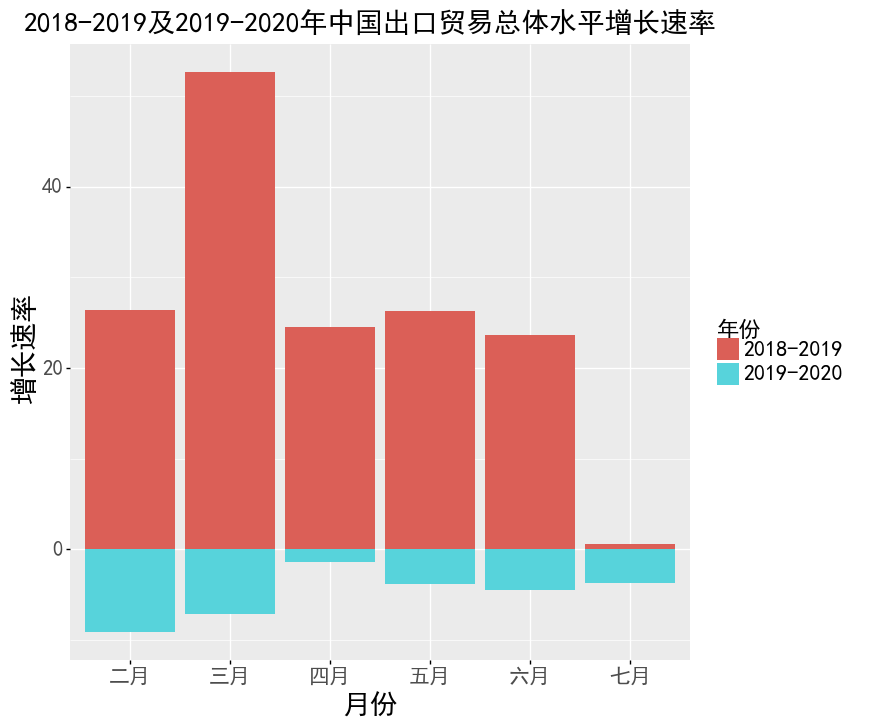

<ggplot: (-9223371900955022600)>

In [39]:
china_bar